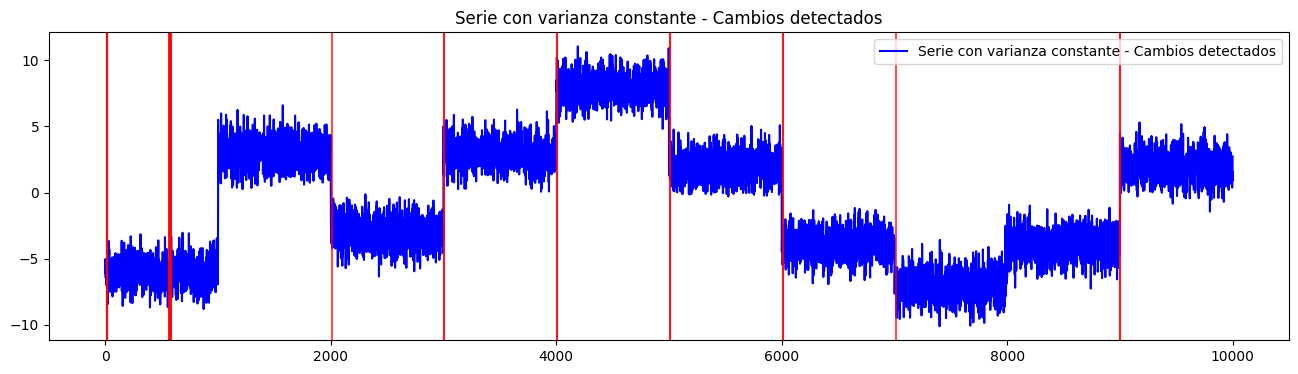

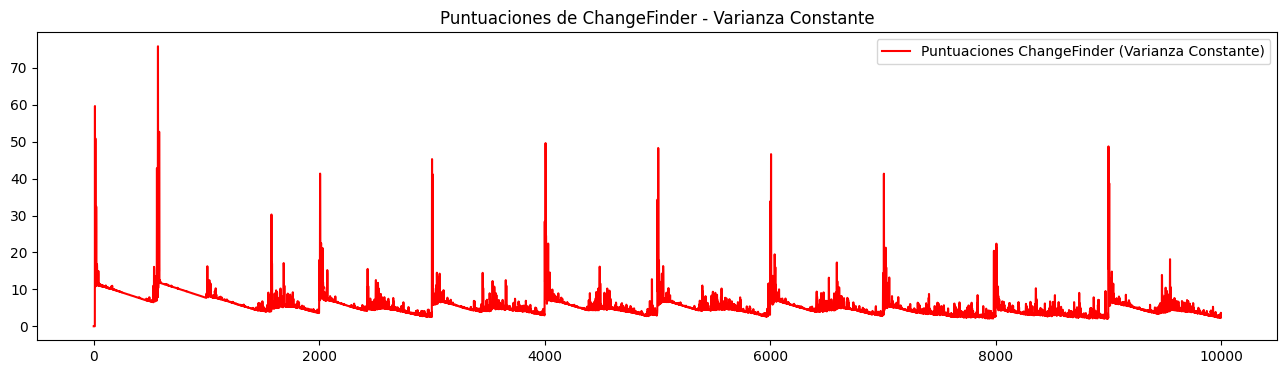

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import changefinder  

# Función para generar una serie con VARIANZA CONSTANTE
def serieVarianzaConstante(num_segmentos, tamano_segmento):
    serie = np.concatenate([
        np.random.normal(np.random.randint(-10, 10), 1, tamano_segmento)  
        for _ in range(num_segmentos)  
    ])
    return pd.Series(serie)  

# Función para graficar la serie con los cambios detectados
def plot_change_points(serie1, serie1_change_loc, title):
    plt.figure(figsize=(16, 4))
    plt.plot(serie1, label=title, color='blue')

    for x in serie1_change_loc:
        plt.axvline(x, lw=1.5, color='red', alpha=0.7)  

    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Generar la serie
serie1 = serieVarianzaConstante(10, 1000)    
serie1_np = serie1.values

# Aplicar ChangeFinder
def findChangePoints(serie1, r=0.01, order=3, smooth=5):
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    serie1_score = [cf.update(p) for p in serie1]
    return serie1_score

# Obtener puntuaciones de cambio
serie1_score1 = findChangePoints(serie1_np, r=0.01, order=3, smooth=5)

# Seleccionar los 20 puntos de cambio más importantes 
serie1_change_loc1 = pd.Series(serie1_score1).nlargest(20).index  

#  Graficar serie con detección de cambios
plot_change_points(serie1, serie1_change_loc1, "Serie con varianza constante - Cambios detectados")

# Graficar puntuaciones de ChangeFinder 
plt.figure(figsize=(16, 4))
plt.plot(serie1_score1, color='red', label="Puntuaciones ChangeFinder (Varianza Constante)")
plt.title("Puntuaciones de ChangeFinder - Varianza Constante")
plt.legend(loc="upper right")
plt.show()

